In [34]:
from standardInclude import *
from fit_util import *

In [2]:
#f = r.TFile("./results_HighKickTest.root")
f = r.TFile("./results_HighKickTest_full.root")
f.cd("farline/calo1")
f.ls()

TFile**		./results_HighKickTest_full.root	
 TFile*		./results_HighKickTest_full.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   TDirectoryFile*		calo1	calo1
    KEY: TH1D	energy;1	calo 1 energies
    KEY: TH1D	wiggle;1	calo 1 T Method
    KEY: TH1D	times;1	calo 1 hit times
    KEY: TH2D	CTAG_over_T0;1	Calo 1 CTAGs / T0 Integral
    KEY: TH2D	hitPositions;1	calo 1 hit positions
    KEY: TH2D	nXtalHits;1	calo 1 n xtal hits
    KEY: TH1D	laserSyncEnergies;1	Calo 1 Energies
    KEY: TH1D	xtal0Energy;1	Calo 1, Crystal 0 energy
    KEY: TH1D	xtal1Energy;1	Calo 1, Crystal 1 energy
    KEY: TH1D	xtal2Energy;1	Calo 1, Crystal 2 energy
    KEY: TH1D	xtal3Energy;1	Calo 1, Crystal 3 energy
    KEY: TH1D	xtal4Energy;1	Calo 1, Crystal 4 energy
    KEY: TH1D	xtal5Energy;1	Calo 1, Crystal 5 energy
    KEY: TH1D	xtal6Energy;1	Calo 1, Crystal 6 energy
    KEY: TH1D	xtal7Energy;1	Calo 1, Crystal 7 energy
    KEY: TH1D	xtal8Energy;1	Calo 1, Crystal 8 energy
    KEY: TH1D	xtal9En

In [3]:
t = f.Get("farline").Get("eventTree")
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :    12510 : Total =      2604460903 bytes  File  Size = 1951829998 *
*        :          : Tree compression factor =   1.33                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    12510 : Total  Size=      68479 bytes  File Size  =      19199 *
*Baskets :      185 : Basket Size=      32000 bytes  Compression=   3.36     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    12510 : Total  Size=      69046 bytes  File Size  =      19754 *
*Baskets :      185 : Basket Size=      32000 bytes  Compression=   3.29     *
*...................................................

In [4]:
allCaloCtags = f.Get("farline").Get("calo1").Get("CTAG_over_T0").Clone()
allCaloCtags.SetDirectory(0)
for calo in range(2,25):
    allCaloCtags.Add( f.Get("farline").Get("calo"+str(calo)).Get("CTAG_over_T0"), 1 )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


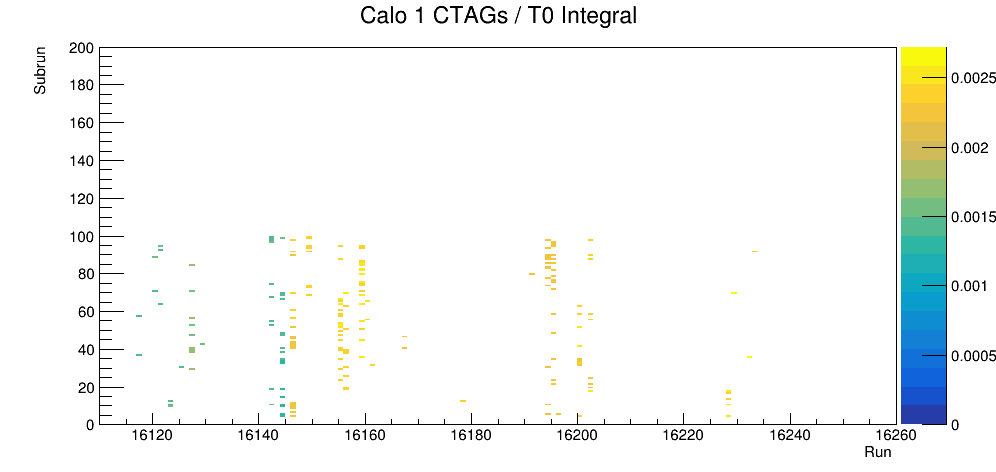

In [9]:
c = r.TCanvas("c","c",1000,500)
#allCaloCtags.GetXaxis().SetRangeUser(16140,16150)
allCaloCtags.GetYaxis().SetRangeUser(0,200)
allCaloCtags.Draw("colz")
c.Draw()

---

### Lets examine the energy spectra before and after this change

In [6]:
dividingRun = 16145

In [52]:
energySpectra = []
for calo in range(1,25):
    print("Starting Calo", calo)
    h1 = r.TH1D("h1_"+str(calo), "Energy Spectra in Calo "+str(calo)+" Before Jump", 600,0,6000)
    h2 = r.TH1D("h2_"+str(calo), "Energy Spectra in Calo "+str(calo)+" After Jump", 600,0,6000)
    h2.SetLineColor(2)
    
    t.Draw("energy>>h1_"+str(calo),"caloNum == "+str(calo)+" && runNum < "+str(dividingRun)+" && time > 24000","goff")
    t.Draw("energy>>h2_"+str(calo),"caloNum == "+str(calo)+" && runNum >= "+str(dividingRun)+" && time > 24000","goff")
    
    #h1.Scale( 1/h1.Integral() )
    #h2.Scale( 1/h2.Integral() )
    
    energySpectra.append( (h1.Clone(), h2.Clone()) )

print(energySpectra)

Starting Calo 1
Starting Calo 2
Starting Calo 3
Starting Calo 4
Starting Calo 5
Starting Calo 6
Starting Calo 7
Starting Calo 8
Starting Calo 9
Starting Calo 10
Starting Calo 11
Starting Calo 12
Starting Calo 13
Starting Calo 14
Starting Calo 15
Starting Calo 16
Starting Calo 17
Starting Calo 18
Starting Calo 19
Starting Calo 20
Starting Calo 21
Starting Calo 22
Starting Calo 23
Starting Calo 24
[(<ROOT.TH1D object ("h1_1") at 0x7fba4c3b34a0>, <ROOT.TH1D object ("h2_1") at 0x7ffff38affc0>), (<ROOT.TH1D object ("h1_2") at 0x7fba4c719660>, <ROOT.TH1D object ("h2_2") at 0x7fba4c3bdcc0>), (<ROOT.TH1D object ("h1_3") at 0x7fba4c3b3080>, <ROOT.TH1D object ("h2_3") at 0x7fba4c75b010>), (<ROOT.TH1D object ("h1_4") at 0x7fba4c3bb3b0>, <ROOT.TH1D object ("h2_4") at 0x7fba4c75cbc0>), (<ROOT.TH1D object ("h1_5") at 0x7ffff38b2960>, <ROOT.TH1D object ("h2_5") at 0x7fba4c3afd30>), (<ROOT.TH1D object ("h1_6") at 0x7ffff38b3060>, <ROOT.TH1D object ("h2_6") at 0x7fba4c3d1860>), (<ROOT.TH1D object ("h1_

In [53]:
for (h1, h2) in energySpectra:
    h1.Scale( 1/h1.Integral() )
    h2.Scale( 1/h2.Integral() )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file sideBySide_calo_001.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file overlap_calo_001.png has been created
Info in <TCanvas::Print>: png file diff_calo_001.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file sideBySide_calo_002.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file overlap_calo_002.png has been created
Info in <TCanvas::Print>: png file diff_calo_002.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file sideBySide_calo_003.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file overlap_calo_003.png has been created

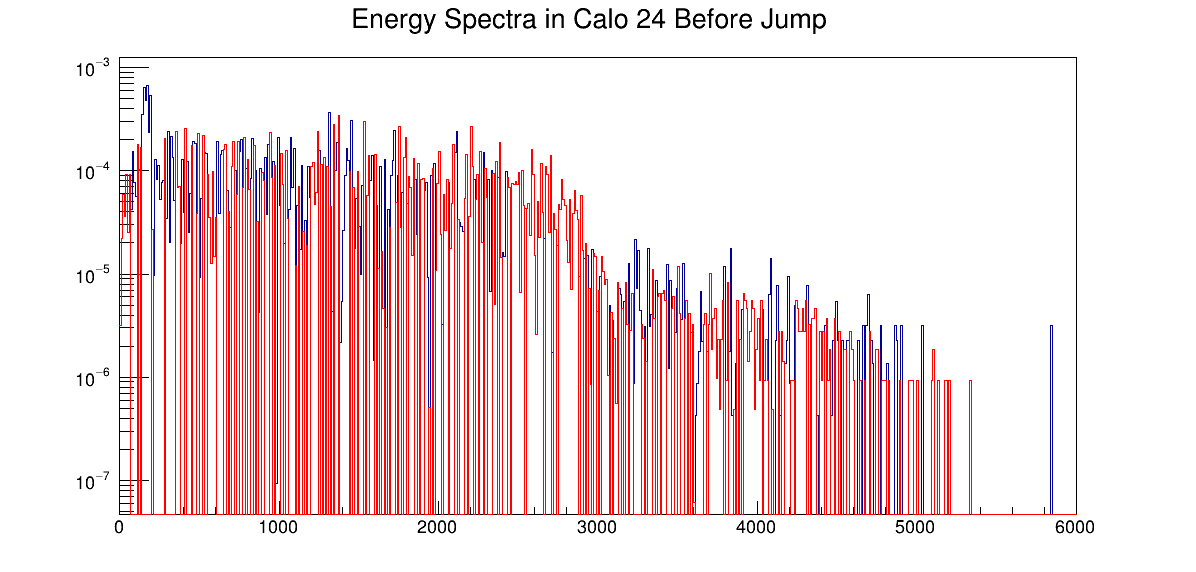

In [54]:
for calo in range(1,25):
    c = r.TCanvas("c","c",1200,600)
    c.Divide(2)
    for i in range(2):
        c.cd(i+1)
        energySpectra[calo-1][i].Draw()
        r.gPad.SetLogy()
    c.Draw()
    c.Print("sideBySide_calo_"+str(calo).zfill(3)+".png")
    
    c = r.TCanvas("c","c",1200,600)
    energySpectra[calo-1][0].Draw()
    energySpectra[calo-1][1].Draw("SAME")
    c.SetLogy()
    c.Draw()
    c.Print("overlap_calo_"+str(calo).zfill(3)+".png")
    
    ediff = energySpectra[calo-1][0].Clone("ediff")
    ediff.Add(energySpectra[calo-1][1], -1)
    ediff.Draw("hist")
    ediffInv = InvertTH1(ediff,"", 2,0).Clone()
    ediffInv.Draw("hist SAME")
    c.Draw()
    c.Print("diff_calo_"+str(calo).zfill(3)+".png")

---

### Now lets look at the laser spectra

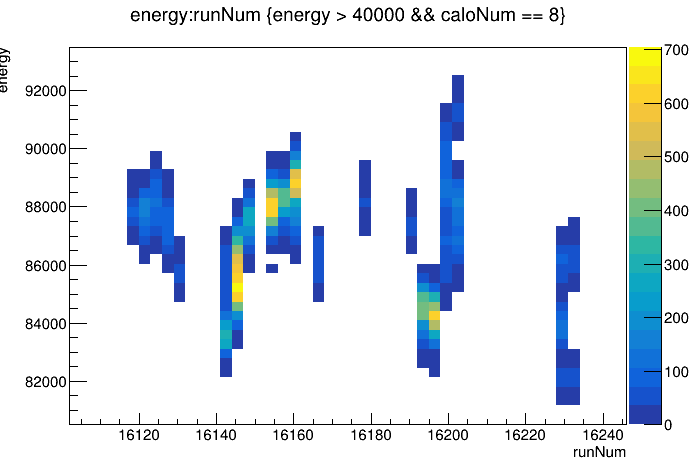

In [57]:
c = r.TCanvas()
t.Draw("energy:runNum","energy > 40000 && caloNum == 8","colz")
c.Draw()

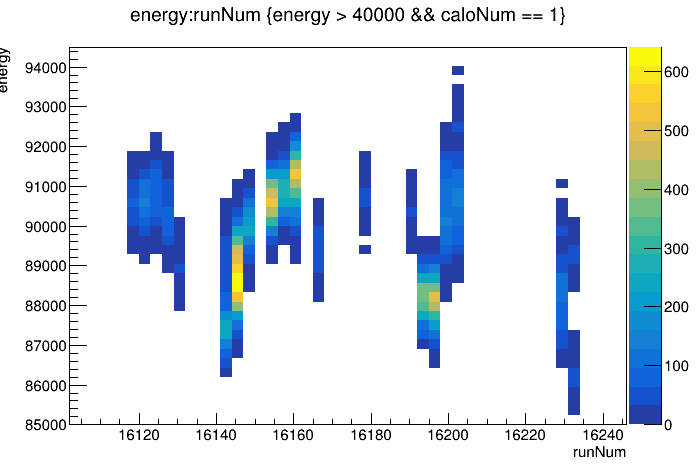

In [58]:
c = r.TCanvas()
t.Draw("energy:runNum","energy > 40000 && caloNum == 1","colz")
c.Draw()

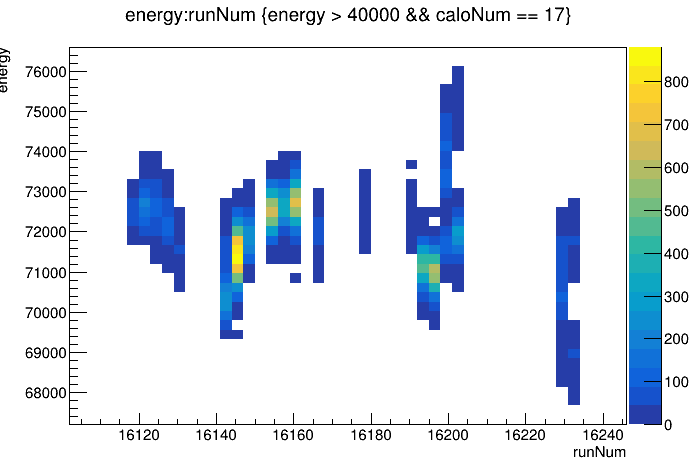

In [59]:
c = r.TCanvas()
t.Draw("energy:runNum","energy > 40000 && caloNum == 17","colz")
c.Draw()